In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('preprocessed_ads.csv')

In [3]:
df.sample(5)

,region,area,age,rooms,total_price,elevator,parking,warehouse,total_price_log,outlier,address_encoded
847,3,110,1399,2,20000000000,True,True,True,23.718998,0,4.033212e+10
7111,2,150,1403,3,24000000000,True,True,True,23.901320,0,1.876026e+10
5306,21,131,1402,2,30000000000,True,True,True,24.124463,0,2.778226e+10
6244,3,170,1403,3,52530000000,True,True,True,24.684650,1,4.033212e+10
8084,4,60,1395,2,4650000000,True,True,True,22.260133,0,5.527719e+09


Encoding Features

In [4]:
# elevator, parking, warehouse are binary features
boolean_cols = ['elevator', 'parking', 'warehouse']
df[boolean_cols] = df[boolean_cols].astype('int64')

df.head()

,region,area,age,rooms,total_price,elevator,parking,warehouse,total_price_log,outlier,address_encoded
0,12,95,1383,2,8000000000,1,1,1,22.802707,0,1.004259e+10
1,14,50,1403,1,4400000000,1,1,0,22.204870,0,7.836039e+09
2,6,115,1398,2,15890000000,1,1,1,23.488956,0,1.955297e+10
3,4,51,1390,1,2000000000,0,1,1,21.416413,0,4.652959e+09
4,1,350,1390,4,52800000000,1,1,1,24.689777,1,3.833089e+10


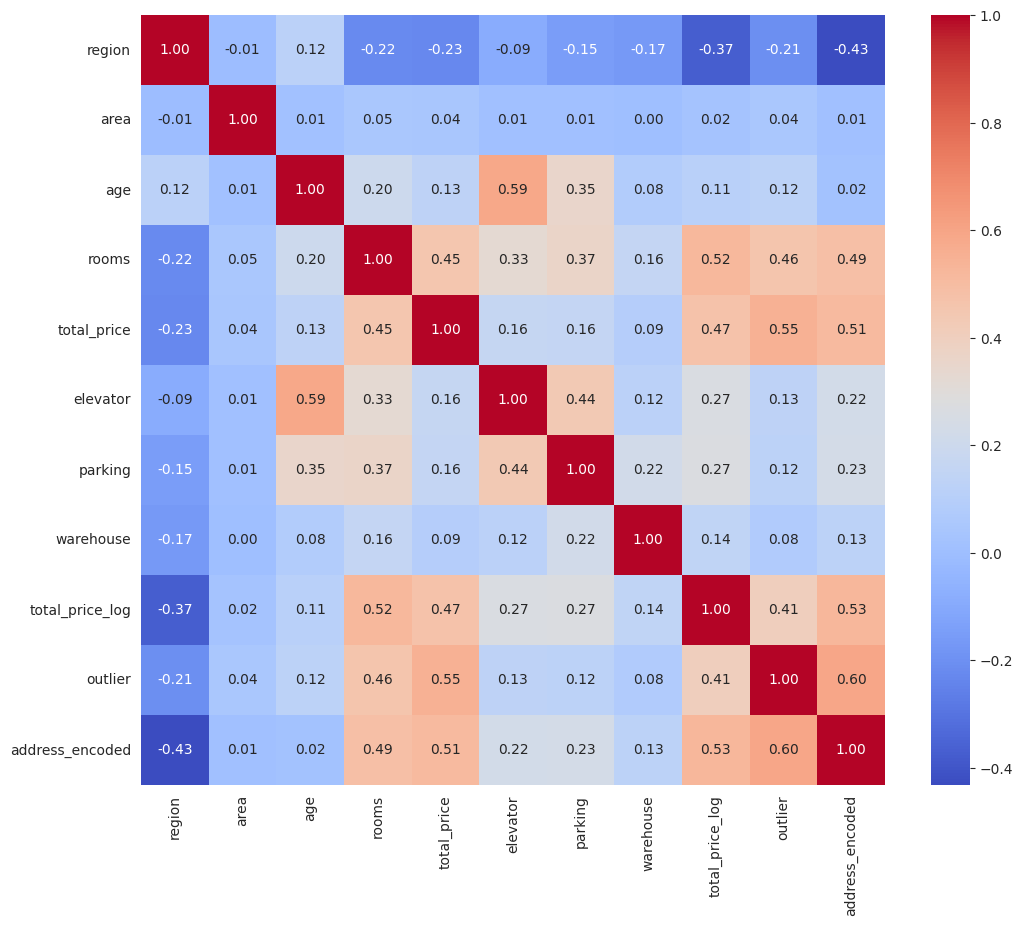

In [6]:
# plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [7]:
# drop the area feature
df.drop(columns=['area'], inplace=True)
df.head()

,region,age,rooms,total_price,elevator,parking,warehouse,total_price_log,outlier,address_encoded
0,12,1383,2,8000000000,1,1,1,22.802707,0,1.004259e+10
1,14,1403,1,4400000000,1,1,0,22.204870,0,7.836039e+09
2,6,1398,2,15890000000,1,1,1,23.488956,0,1.955297e+10
3,4,1390,1,2000000000,0,1,1,21.416413,0,4.652959e+09
4,1,1390,4,52800000000,1,1,1,24.689777,1,3.833089e+10


In [8]:
# one hot encoding for the region feature
df = pd.get_dummies(df, columns=['region'], dtype='int64')
df.head()

,age,rooms,total_price,elevator,parking,warehouse,total_price_log,outlier,address_encoded,region_1,...,region_13,region_14,region_15,region_16,region_17,region_18,region_19,region_20,region_21,region_22
0,1383,2,8000000000,1,1,1,22.802707,0,1.004259e+10,0,...,0,0,0,0,0,0,0,0,0,0
1,1403,1,4400000000,1,1,0,22.204870,0,7.836039e+09,0,...,0,1,0,0,0,0,0,0,0,0
2,1398,2,15890000000,1,1,1,23.488956,0,1.955297e+10,0,...,0,0,0,0,0,0,0,0,0,0
3,1390,1,2000000000,0,1,1,21.416413,0,4.652959e+09,0,...,0,0,0,0,0,0,0,0,0,0
4,1390,4,52800000000,1,1,1,24.689777,1,3.833089e+10,1,...,0,0,0,0,0,0,0,0,0,0


Log Transform the area

In [9]:
# df['area_log'] = np.log1p(df['area'])
# df.head()

In [10]:
df.to_csv('featured_ads.csv', index=False)